## Ringkasan Dataset Prediksi Banjir

Dataset ini bertujuan untuk memprediksi probabilitas banjir berdasarkan berbagai faktor yang berkontribusi. Dataset ini berisi 1.117.957 entri dengan karakteristik sebagai berikut:

**Variabel Target:**

*   `FloodProbability` (float64): Probabilitas terjadinya banjir. Inilah yang akan diprediksi menggunakan model regresi.

**Variabel Prediktor (semua int64):**

Fitur-fitur ini mencakup berbagai aspek yang berpotensi memengaruhi probabilitas banjir, dikelompokkan sebagai berikut:

*   **Lingkungan/Geografis:**
    *   `MonsoonIntensity`
    *   `TopographyDrainage`
    *   `CoastalVulnerability`
    *   `Landslides`
    *   `Watersheds`
    *   `WetlandLoss`

*   **Dampak/Pengelolaan Manusia:**
    *   `RiverManagement`
    *   `Deforestation`
    *   `Urbanization`
    *   `DamsQuality`
    *   `Siltation`
    *   `AgriculturalPractices`
    *   `Encroachments`
    *   `DrainageSystems`

*   **Infrastruktur/Perencanaan:**
    *   `DeterioratingInfrastructure`
    *   `InadequatePlanning`

*   **Sosial-Ekonomi/Politik:**
    *   `PopulationScore`
    *   `IneffectiveDisasterPreparedness`
    *   `PoliticalFactors`

*   **Iklim:**
    *   `ClimateChange`

*   **Identifikasi:**
    *   `id`

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [2]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


**Interpretasi Utama:**

*   **Jumlah Data (`count`):** Semua kolom memiliki 1.117.957 data, mengkonfirmasi tidak adanya *missing values* seperti yang disebutkan sebelumnya.
*   **Nilai Rata-rata (`mean`):**
    *   Kolom `id` memiliki rata-rata sekitar 5.59e+05, yang sesuai dengan setengah dari jumlah total data, seperti yang diharapkan untuk *unique identifier*.
    *   Semua variabel prediktor (dari `MonsoonIntensity` hingga `PoliticalFactors`) memiliki rata-rata sekitar 4.9, mendekati 5. Ini menunjukkan bahwa nilai-nilai tersebut cenderung terpusat di sekitar nilai tengah skala yang digunakan (kemungkinan skala 0-10 atau serupa, perlu konfirmasi lebih lanjut).
    *   `FloodProbability` memiliki rata-rata sekitar 0.5, yang berarti probabilitas banjir rata-rata adalah 50%.
*   **Standar Deviasi (`std`):**
    *   Standar deviasi untuk variabel prediktor berkisar antara 2.05 hingga 2.09. Ini menunjukkan sebaran data yang cukup moderat di sekitar rata-rata.
    *   `FloodProbability` memiliki standar deviasi yang jauh lebih kecil, sekitar 0.05, menunjukkan bahwa nilai-nilainya lebih terkonsentrasi di sekitar rata-rata.
*   **Nilai Minimum dan Maksimum (`min` dan `max`):**
    *   Sebagian besar variabel prediktor memiliki nilai minimum 0 dan nilai maksimum antara 16 dan 19. Ini menguatkan dugaan bahwa variabel-variabel ini menggunakan skala ordinal atau rating.
    *   `FloodProbability` memiliki nilai minimum 0.285 dan maksimum 0.725. Ini menunjukkan rentang probabilitas banjir yang mungkin terjadi.
*   **Kuartil (25%, 50%, 75%):** Kuartil memberikan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
df = df.drop("id", axis=1)

**Mengapa menghapus kolom "id"?**

Dalam banyak kasus, kolom "id" (atau indeks) berfungsi sebagai pengidentifikasi unik untuk setiap baris data. Kolom ini seringkali tidak memberikan informasi yang berguna untuk pemodelan *machine learning*. Model *machine learning* biasanya belajar dari fitur-fitur lain dalam data, dan kolom "id" biasanya tidak berkorelasi dengan variabel target. Oleh karena itu, biasanya aman dan bahkan disarankan untuk menghapus kolom "id" sebelum melatih model.


In [7]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


# Explaratory Data Analysis

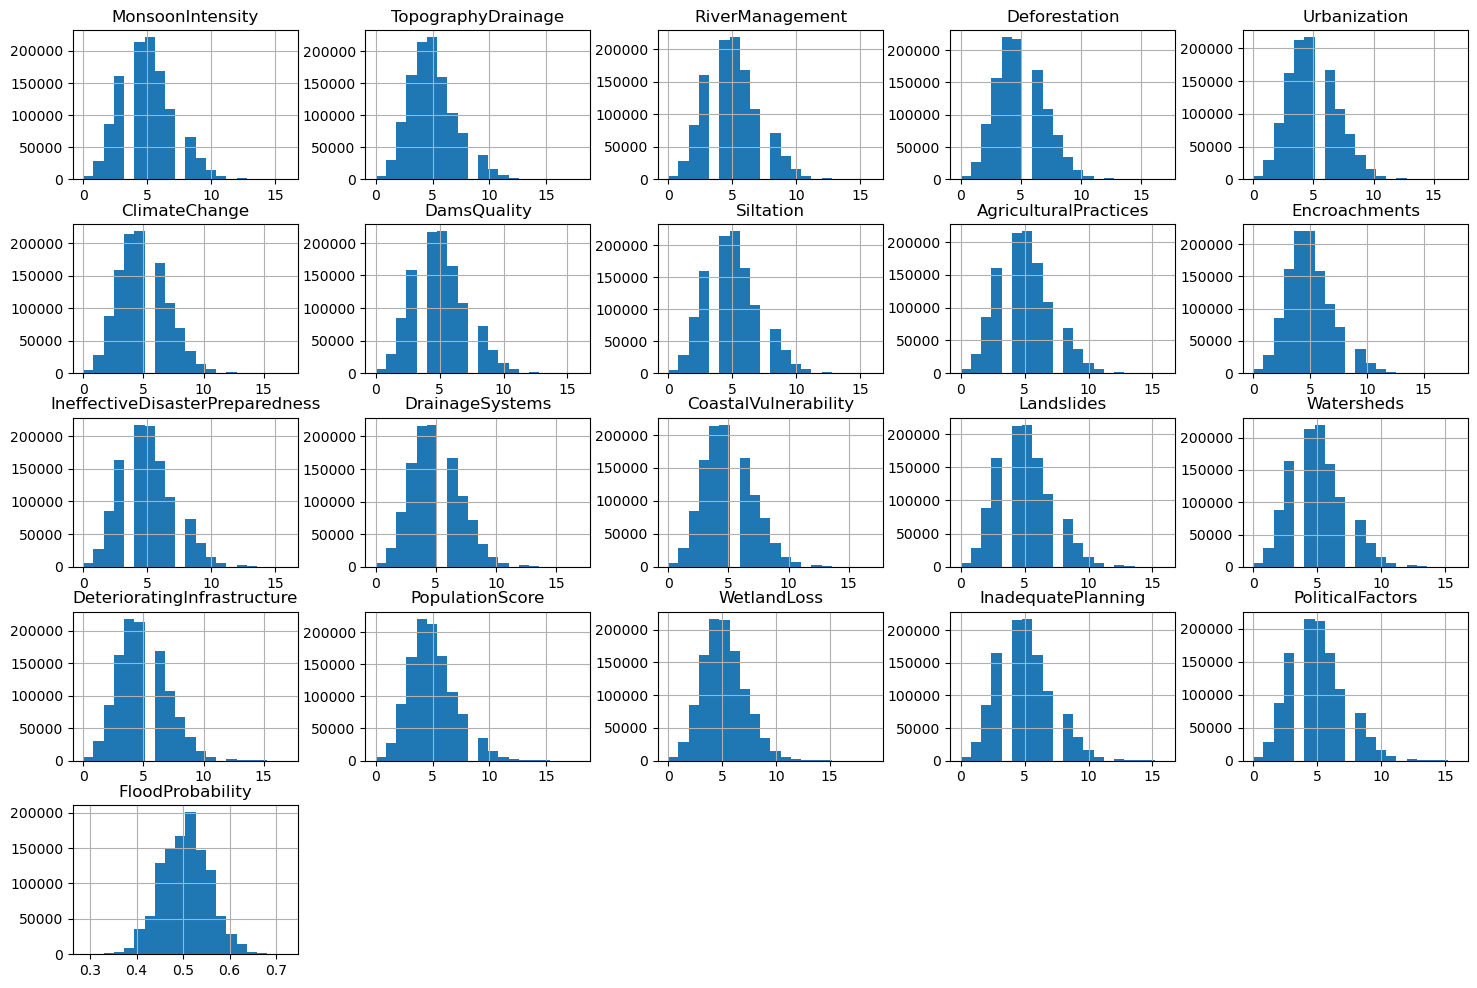

In [8]:
df.hist(bins=20, figsize=(18, 12))
plt.tight_layout
plt.show()

## Interpretasi Histogram Dataset Prediksi Banjir

Anda telah memvisualisasikan distribusi setiap variabel dalam dataset menggunakan histogram. Berikut interpretasi umum dan poin-poin penting yang dapat diamati:

**Poin Umum:**

*   **Skala Ordinal/Rating:** Sebagian besar histogram untuk variabel prediktor (seperti `MonsoonIntensity`, `TopographyDrainage`, `RiverManagement`, dll.) menunjukkan distribusi yang diskrit dan cenderung terpusat di sekitar nilai 5, dengan rentang nilai umumnya dari 0 hingga sekitar 15-18. Ini semakin memperkuat indikasi bahwa variabel-variabel ini kemungkinan direpresentasikan dalam skala ordinal atau rating (misalnya, skala 1-10, 0-15, dll.), di mana angka yang lebih tinggi menunjukkan intensitas atau tingkat yang lebih tinggi dari faktor terkait.
*   **Distribusi Tidak Normal:** Sebagian besar variabel prediktor menunjukkan distribusi yang tidak normal (tidak mengikuti kurva lonceng Gaussian). Beberapa histogram menunjukkan *skewness* (kemiringan), di mana ekor distribusi lebih panjang di satu sisi.
*   **`FloodProbability`:** Histogram untuk `FloodProbability` menunjukkan distribusi yang lebih terkonsentrasi di sekitar nilai tengah (sekitar 0.5), dengan rentang yang relatif sempit antara sekitar 0.3 dan 0.7. Ini menunjukkan bahwa sebagian besar data memiliki probabilitas banjir di sekitar nilai tengah tersebut.

**Interpretasi Lebih Detail per Kelompok Variabel:**

Meskipun interpretasi yang lebih spesifik memerlukan pemahaman konteks yang lebih dalam tentang arti setiap variabel, berikut beberapa observasi berdasarkan bentuk histogram:

*   **Variabel Lingkungan/Geografis (misalnya, `MonsoonIntensity`, `TopographyDrainage`, `CoastalVulnerability`, dll.):** Histogram untuk variabel-variabel ini umumnya menunjukkan distribusi yang mirip, dengan puncak di sekitar nilai 5 dan penurunan frekuensi ke arah nilai yang lebih tinggi dan lebih rendah. Ini mungkin menunjukkan bahwa sebagian besar area memiliki tingkat faktor lingkungan/geografis yang moderat.
*   **Variabel Dampak/Pengelolaan Manusia (misalnya, `Deforestation`, `Urbanization`, `DamsQuality`, dll.):** Mirip dengan variabel lingkungan/geografis, variabel-variabel ini juga cenderung terpusat di sekitar nilai 5, menunjukkan tingkat dampak/pengelolaan manusia yang moderat secara umum.
*   **Variabel Infrastruktur/Perencanaan (misalnya, `DeterioratingInfrastructure`, `InadequatePlanning`):** Histogram untuk variabel-variabel ini juga menunjukkan pola yang serupa.
*   **Variabel Sosial-Ekonomi/Politik (misalnya, `PopulationScore`, `PoliticalFactors`):** Polanya juga serupa.
*   **`FloodProbability` (Variabel Target):** Distribusinya lebih terkonsentrasi di sekitar 0.5, seperti yang disebutkan sebelumnya. Ini penting untuk diingat saat memilih dan mengevaluasi model prediksi.

**Langkah Selanjutnya:**

*   **Analisis Univariat Lebih Lanjut:** Hitung statistik deskriptif tambahan seperti *skewness* dan *kurtosis* untuk mengukur secara kuantitatif bentuk distribusi.
*   **Transformasi Data:** Jika diperlukan, terapkan transformasi data (misalnya, transformasi log, transformasi Box-Cox) untuk menangani *skewness* dan mendekati distribusi normal, yang dapat bermanfaat untuk beberapa model *machine learning*.
*   **Analisis Bivariat/Multivariat:** Lakukan analisis korelasi dan visualisasi *scatter plot* untuk memahami hubungan antar variabel dan antara variabel prediktor dengan variabel target (`FloodProbability`).
*   **Pertimbangkan Konteks:** Interpretasi yang lebih bermakna memerlukan pemahaman konteks yang lebih dalam tentang arti setiap variabel. Konsultasikan dokumentasi atau ahli domain jika diperlukan.

**Contoh Interpretasi Spesifik (Hipotesis):**

Misalnya, jika histogram `MonsoonIntensity` menunjukkan frekuensi yang sangat tinggi pada nilai 10 ke atas, ini bisa diinterpretasikan sebagai indikasi bahwa daerah tersebut sering mengalami musim hujan dengan intensitas tinggi, yang berpotensi meningkatkan risiko banjir. Sebaliknya, jika `DamsQuality` terkonsentrasi pada nilai rendah (misalnya, 1-3), ini dapat mengindikasikan kualitas bendungan yang buruk, yang juga dapat meningkatkan risiko banjir.

Dengan interpretasi ini, Anda dapat mulai membangun pemahaman yang lebih baik tentang karakteristik data Anda dan bagaimana faktor-faktor yang berbeda dapat berkontribusi terhadap probabilitas banjir.

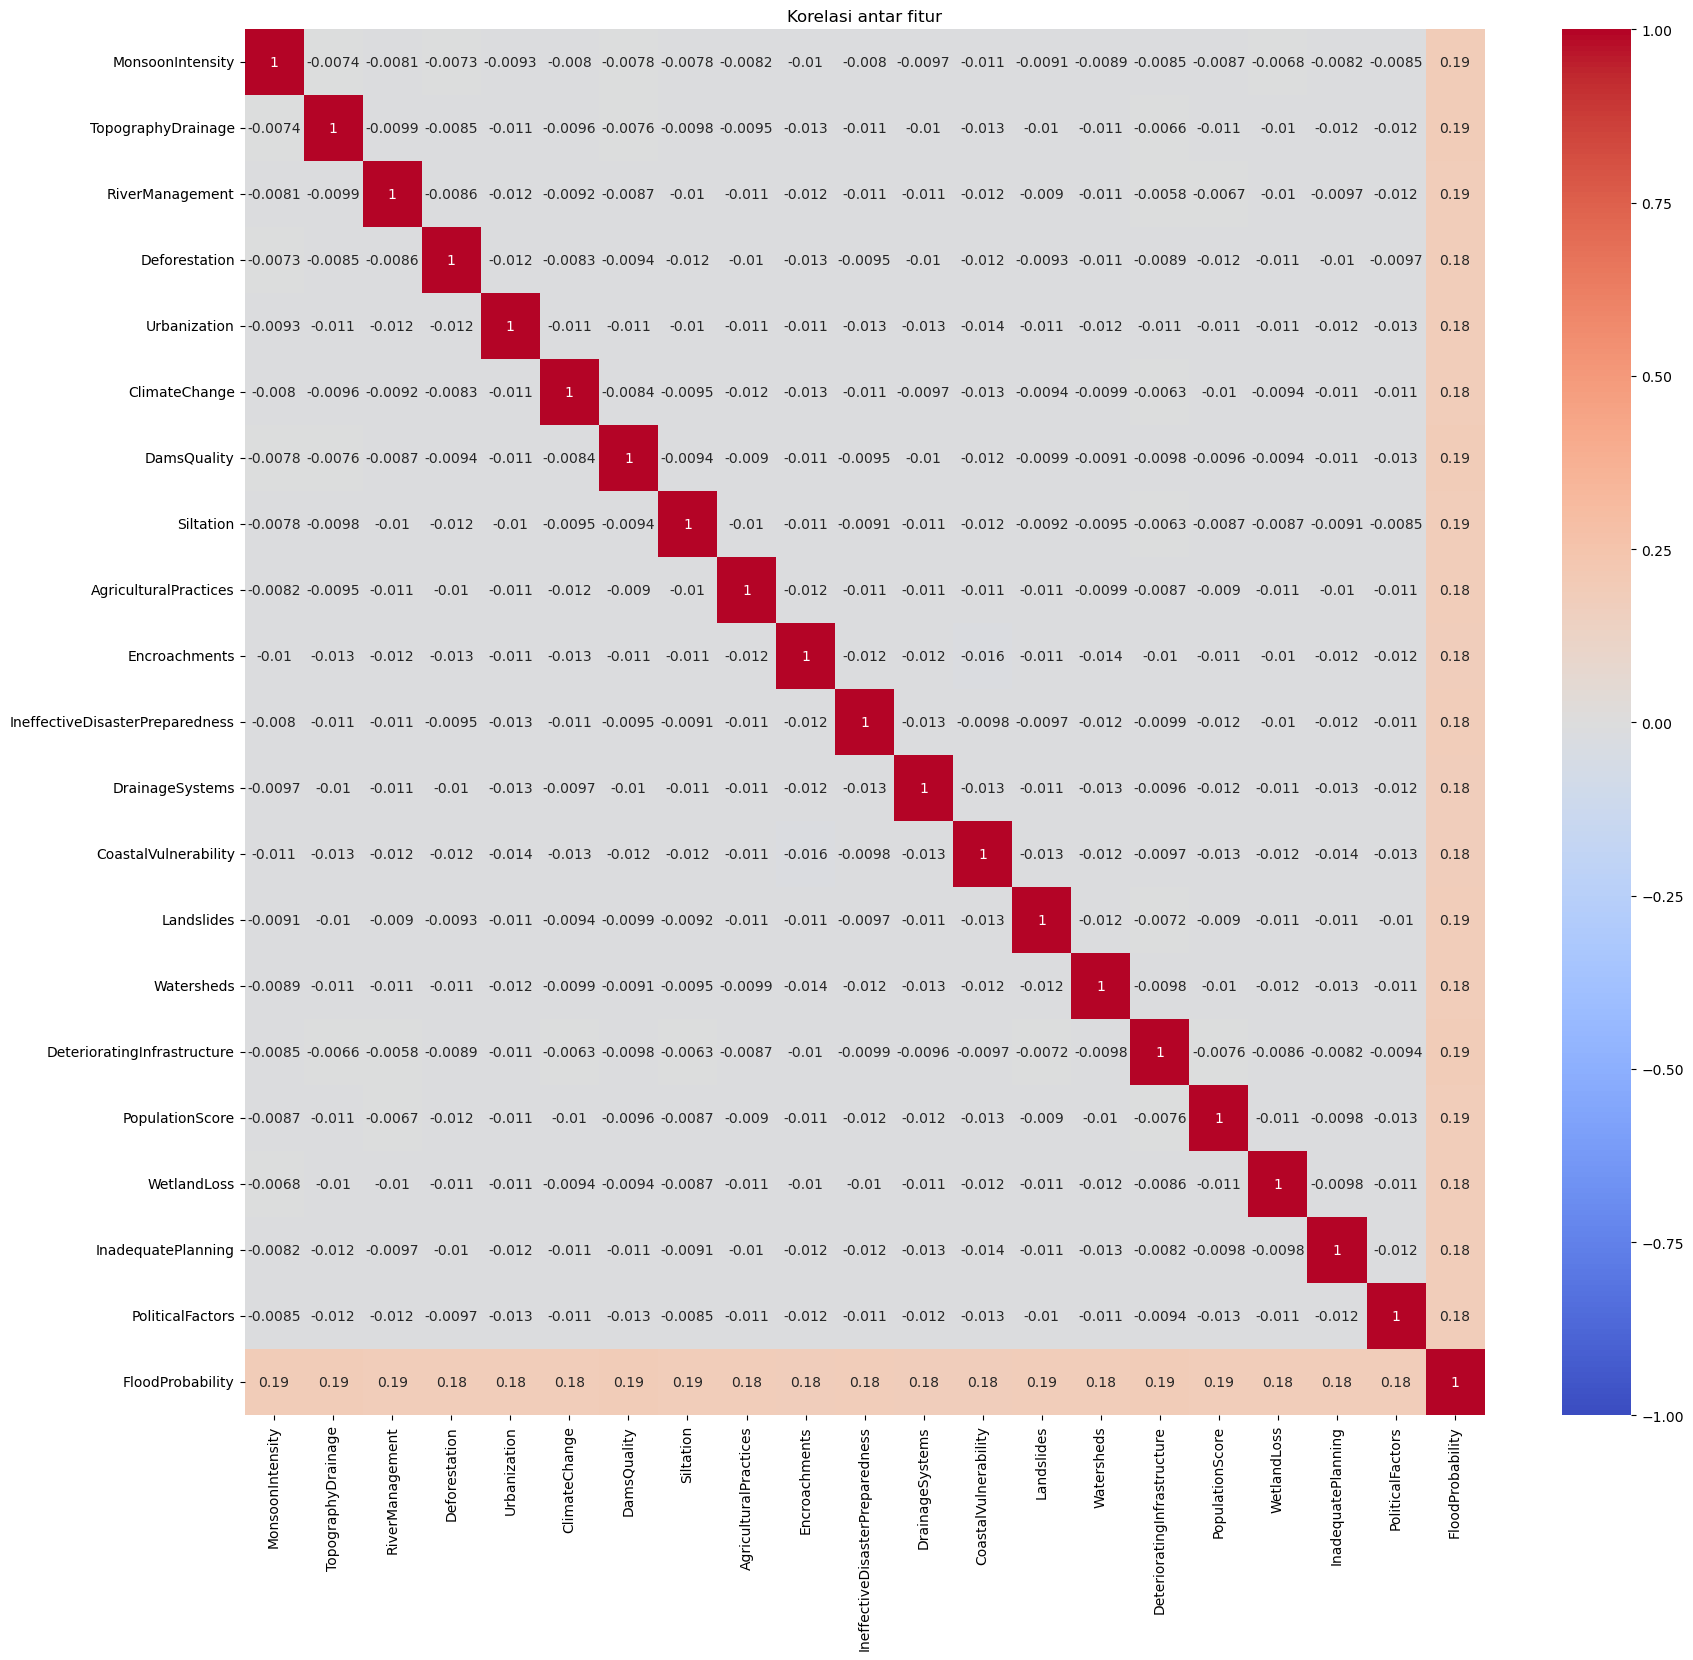

In [9]:
# korelasi heatmap
plt.figure(figsize=(20, 18))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi antar fitur")
plt.show()

**Observasi Umum dari Heatmap:**

Dari heatmap yang diberikan, beberapa observasi penting dapat ditarik:

*   **Korelasi Lemah Antar Prediktor:** Sebagian besar kotak dalam heatmap berwarna putih atau abu-abu muda, yang mengindikasikan bahwa antar variabel prediktor (misalnya, `MonsoonIntensity`, `TopographyDrainage`, `Urbanization`, dll.) umumnya memiliki korelasi linier yang sangat lemah. Ini merupakan hal yang baik, karena korelasi yang tinggi antar prediktor (multikolinearitas) dapat menyulitkan interpretasi model dan mengurangi stabilitasnya.
*   **Korelasi Positif Lemah dengan `FloodProbability`:** Baris/kolom terakhir dalam heatmap merepresentasikan korelasi setiap variabel dengan `FloodProbability`. Dapat diamati bahwa semua variabel prediktor memiliki korelasi positif yang lemah dengan `FloodProbability` (warna merah muda/merah muda pucat). Nilai korelasinya sekitar 0.18-0.20. Ini berarti peningkatan pada variabel prediktor *sedikit* meningkatkan probabilitas banjir, tetapi hubungannya tidak terlalu kuat.
*   **Tidak Ada Korelasi Negatif yang Signifikan:** Tidak ada warna biru tua yang terlihat pada heatmap, yang berarti tidak ada korelasi negatif yang kuat antara variabel manapun.

# Preprocessing data

In [10]:
# Check missing values
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Menunjukkan bahwa *tidak ada nilai yang hilang* di kolom manapun. Semua kolom memiliki nilai 0. Ini sangat baik, karena itu tidak perlu melakukan penanganan nilai hilang (misalnya, imputasi atau penghapusan baris).


In [11]:
# Split data
from sklearn.model_selection import train_test_split

X=df.drop(columns="FloodProbability")
y=df["FloodProbability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

# Menghitung jumlah data
print("Jumlah data = ", len(X))

# Menghitung jumlah data pada X_train
print("Jumlah data latih = ", len(X_train))

# Menghitung jumlah data pada X_test
print("Jumlah data test = ", len(X_test))

Jumlah data =  1117957
Jumlah data latih =  894365
Jumlah data test =  223592


Melakukan split data dan membaginya menjadi 80% data train dan 20% data test, hal ini dilakukan agar model dapat bekerja dengan baik

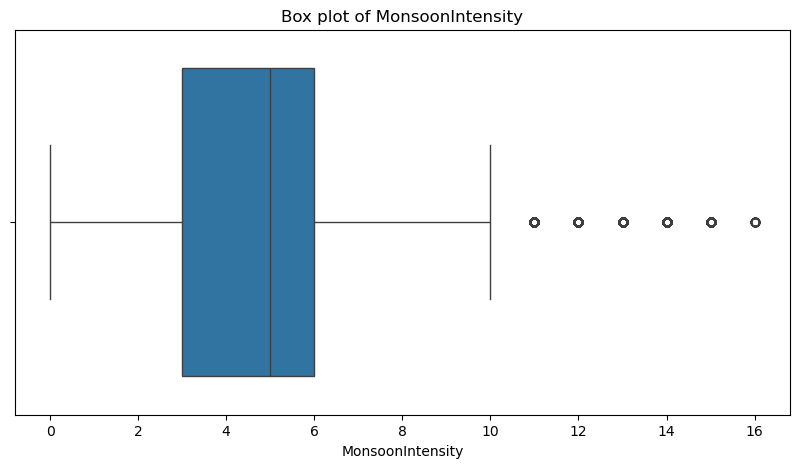

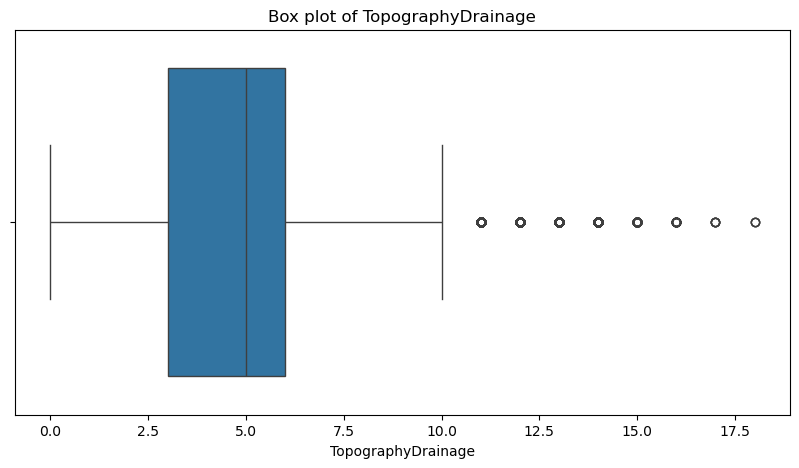

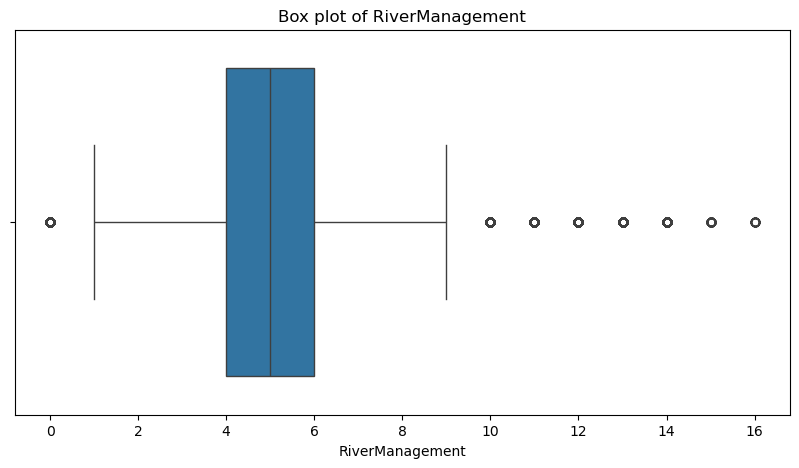

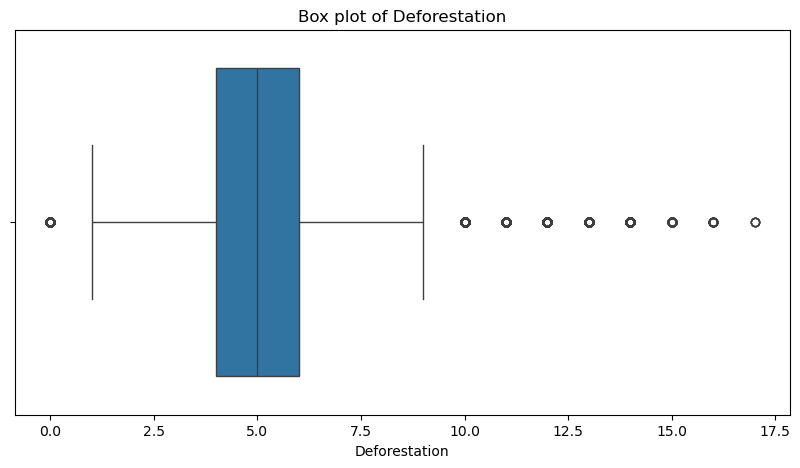

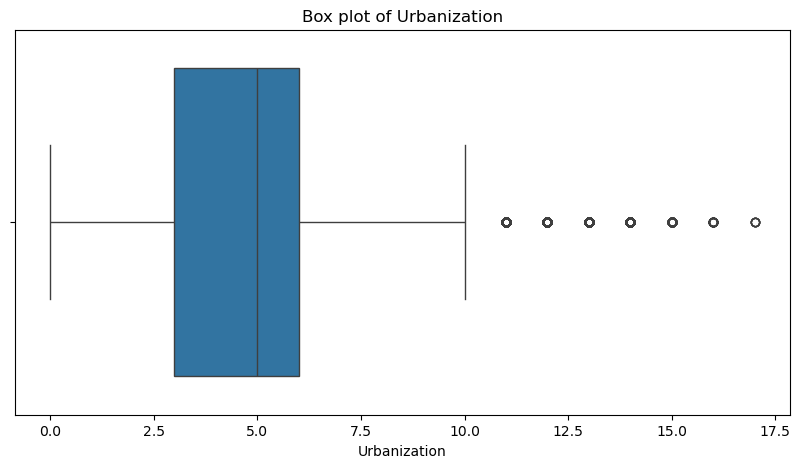

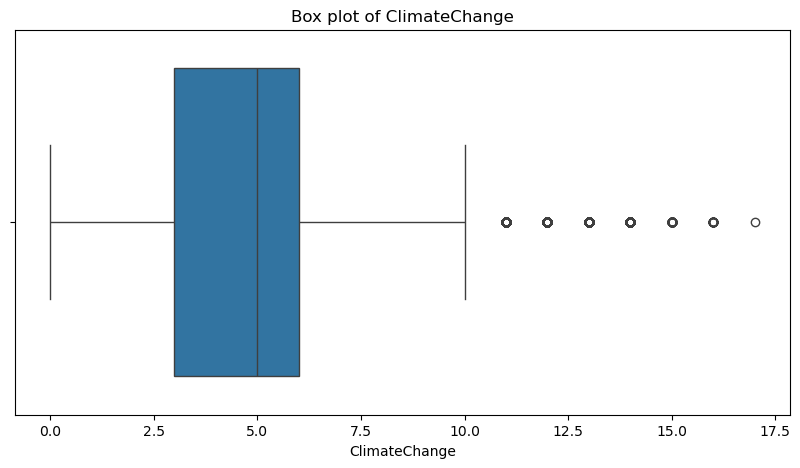

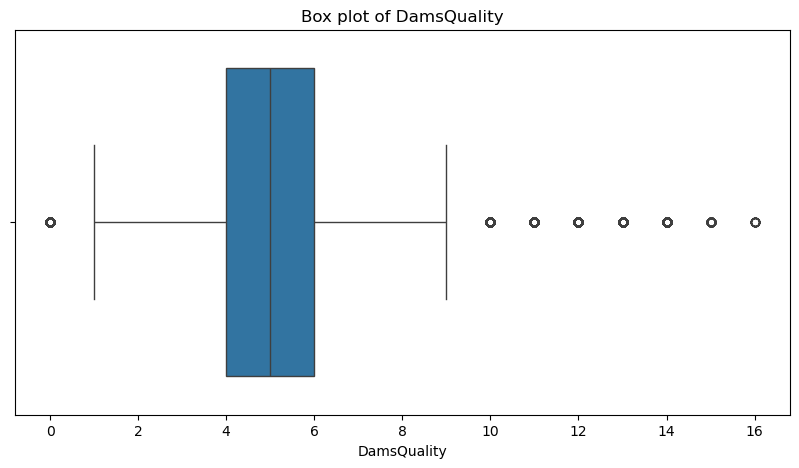

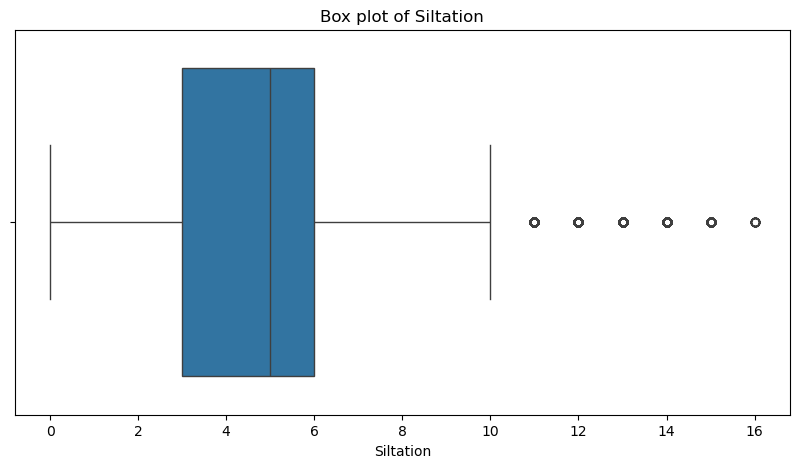

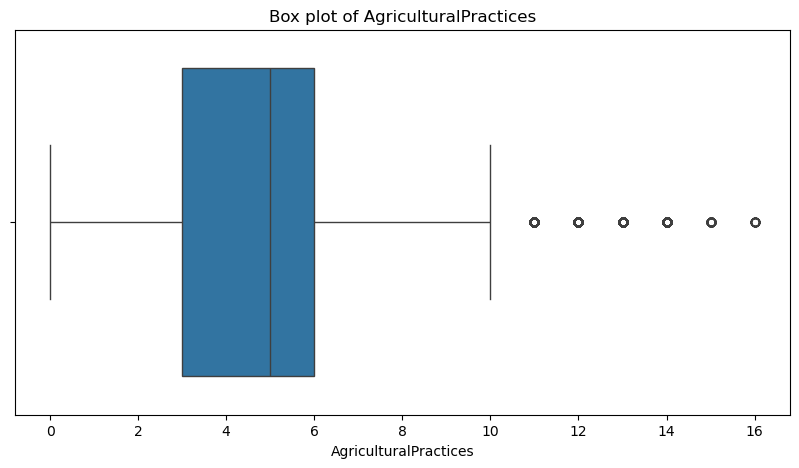

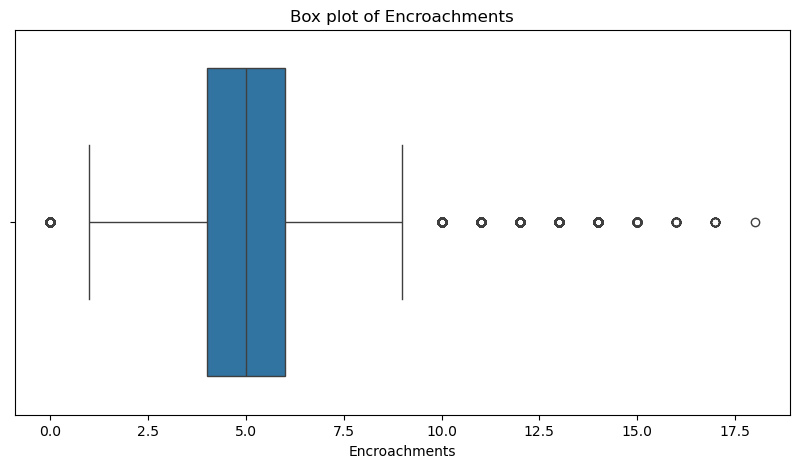

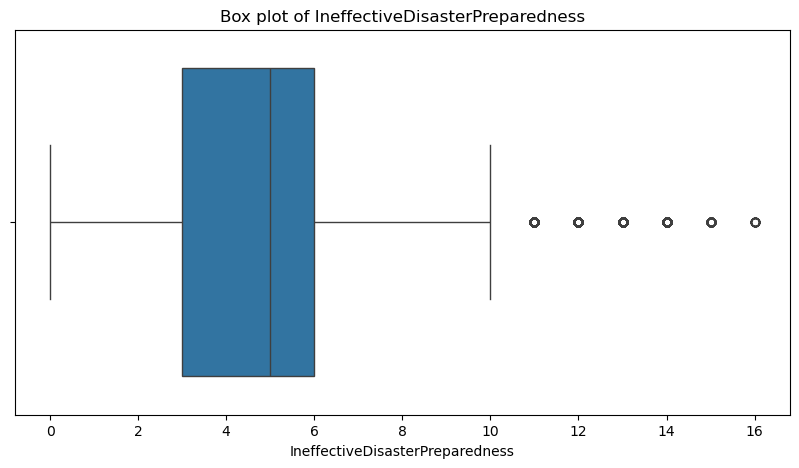

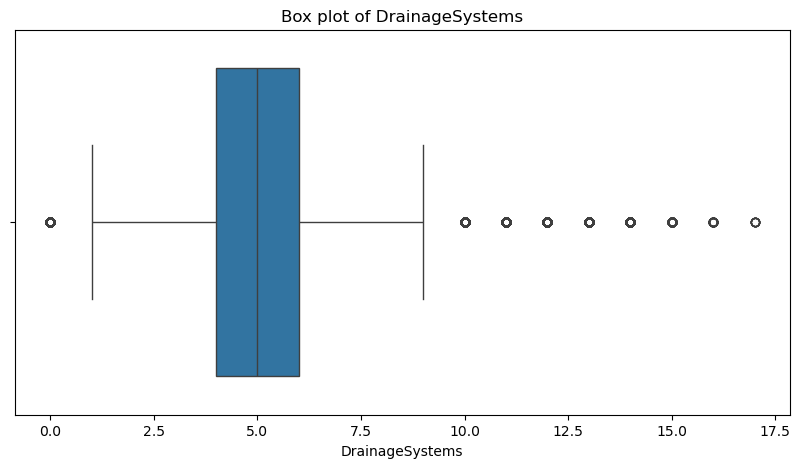

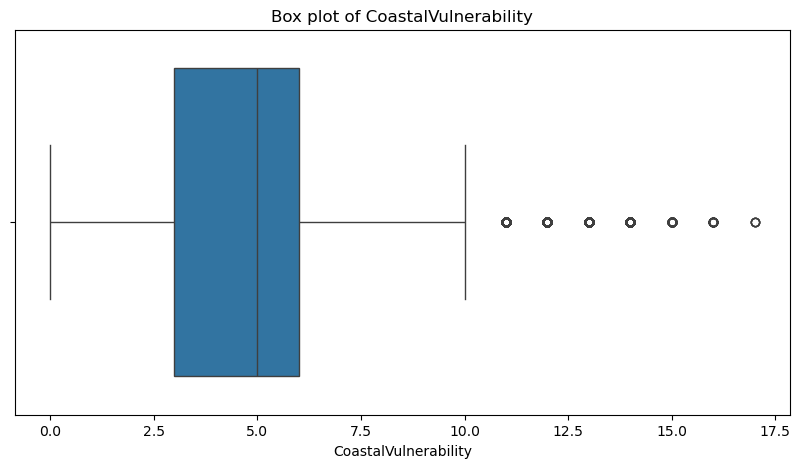

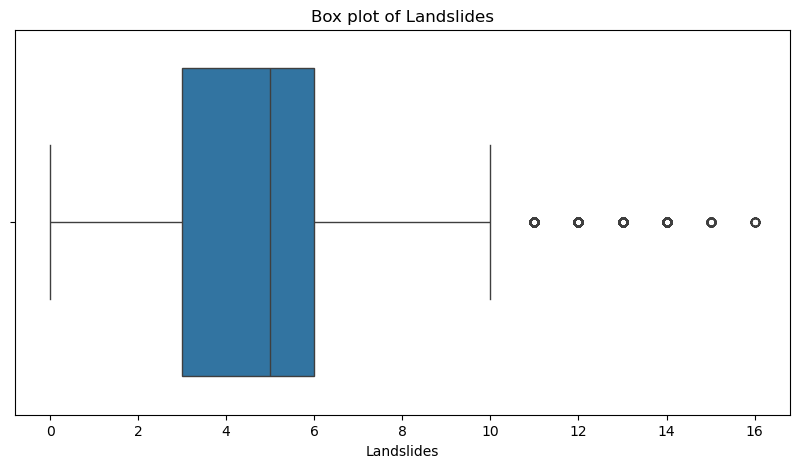

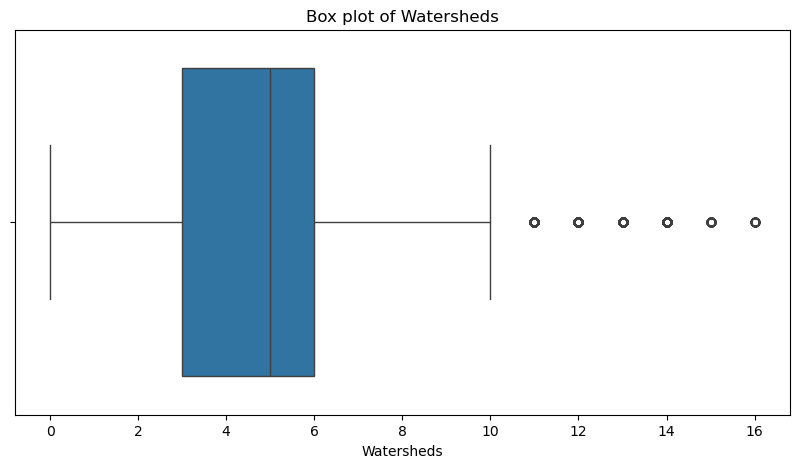

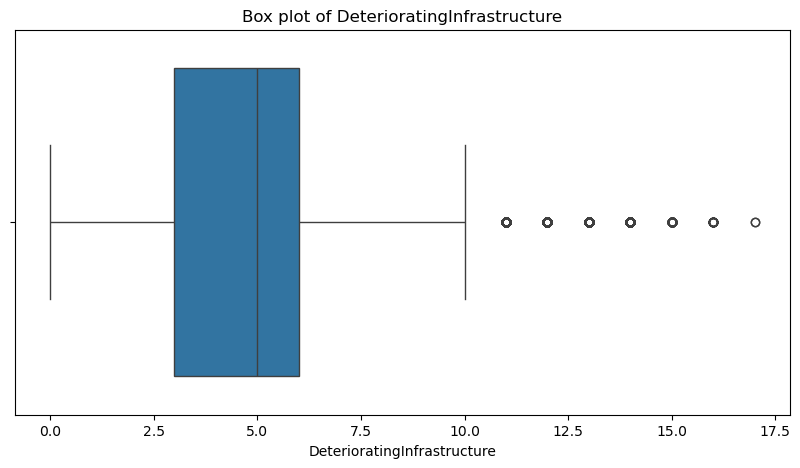

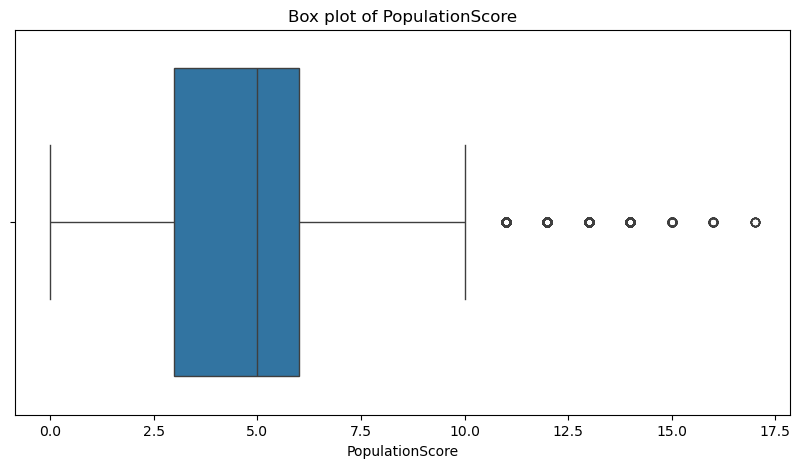

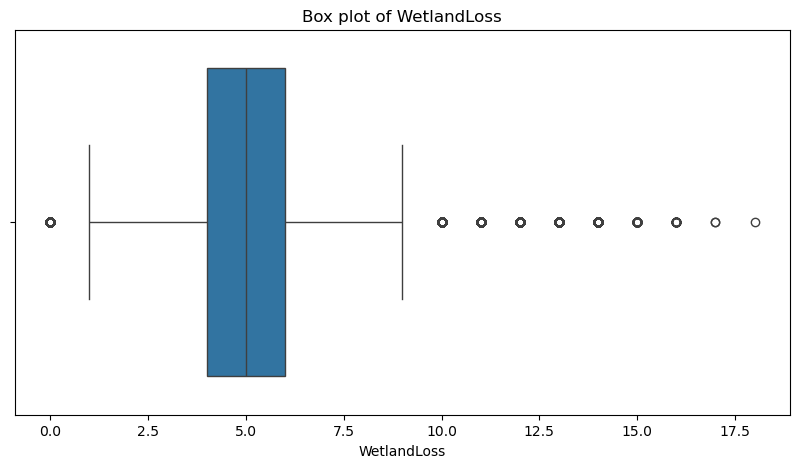

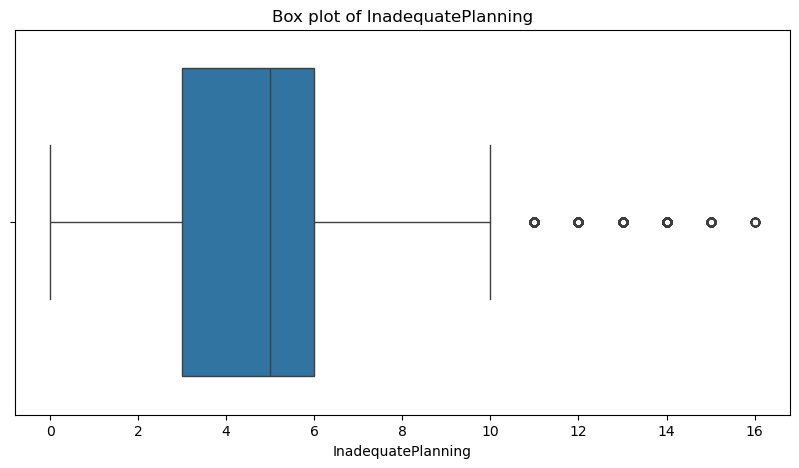

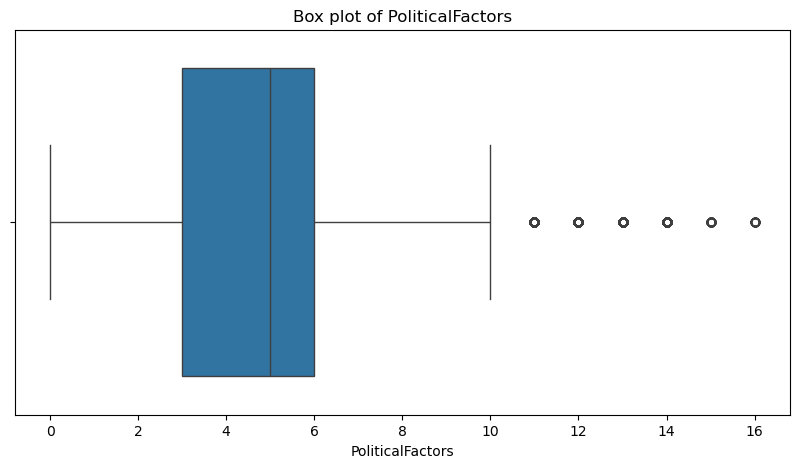

In [12]:
# sebelum handling outlier
for feature in X_train.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=feature, data=X_train)
    plt.title(f"Box plot of {feature}")
    plt.show()

Dari hasil output yang diberikan, masih terdapat outlier di beberapa fitur. Oleh karena itu kita harus menghandlingnya agar mendapatkan hasil modelling yang baik,

In [13]:
# mengidentifikasi outliers dengan IQR

for feature in X_train.columns:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train[feature] = np.where(X_train[feature] < lower_bound, lower_bound, X_train[feature])
    X_train[feature] = np.where(X_train[feature] > upper_bound, upper_bound, X_train[feature])

Handling outlier menggunakan IQR

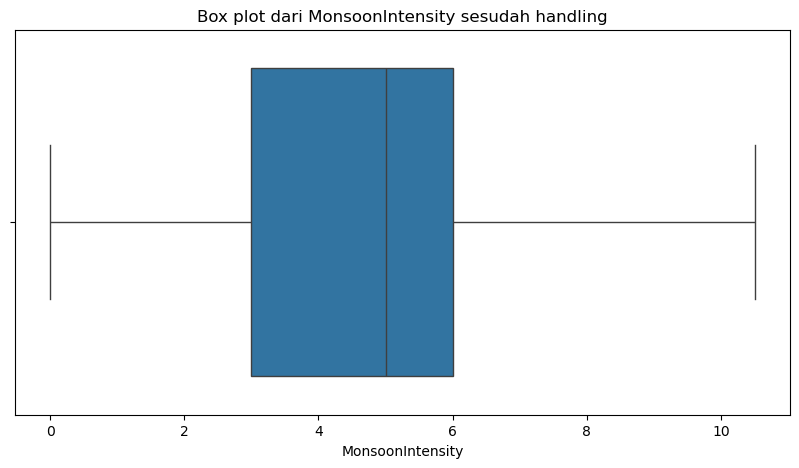

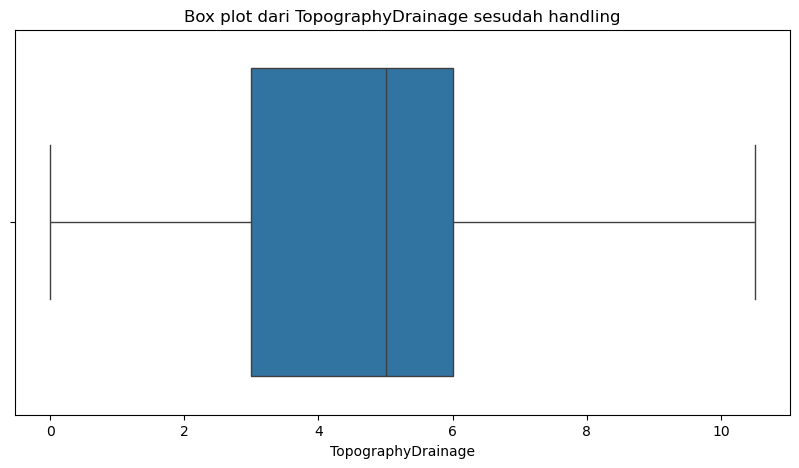

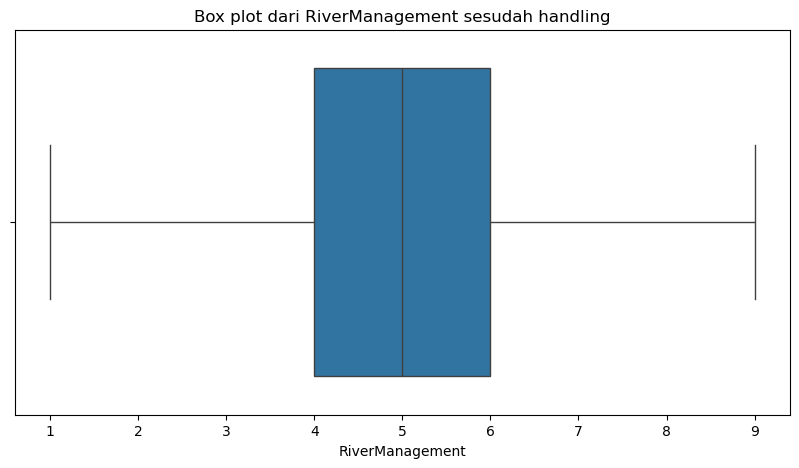

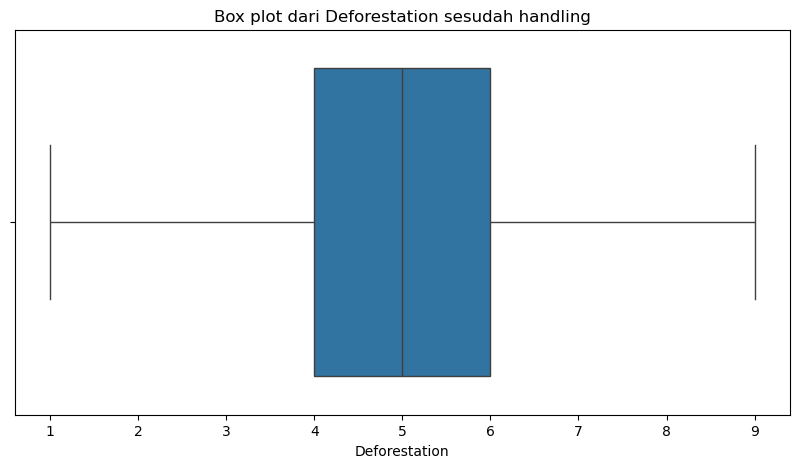

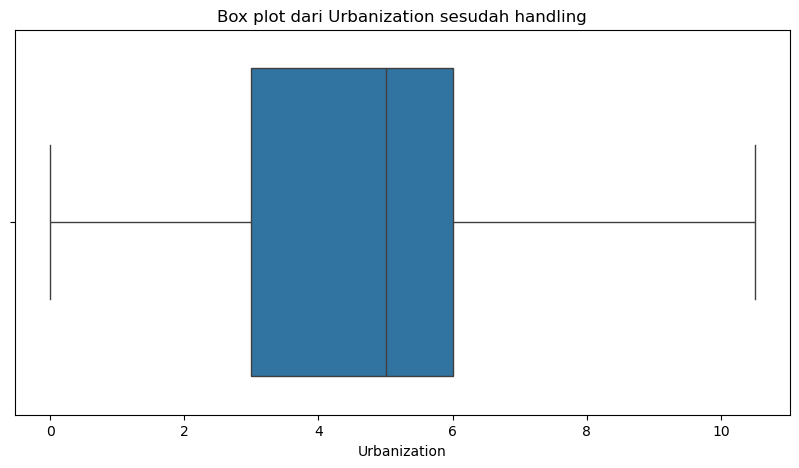

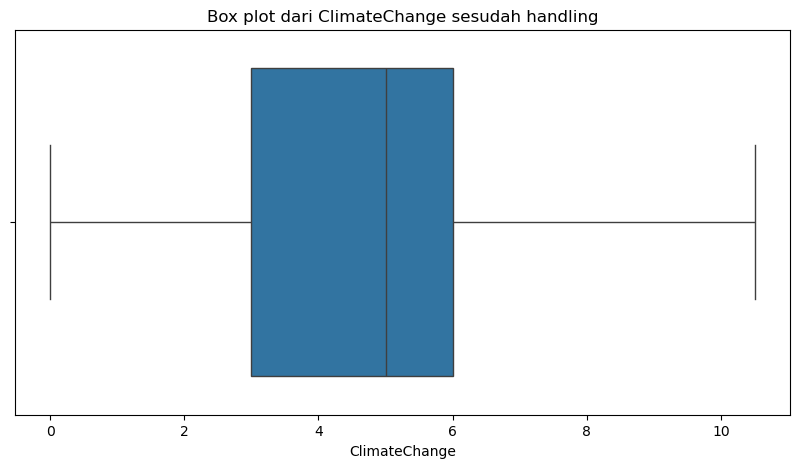

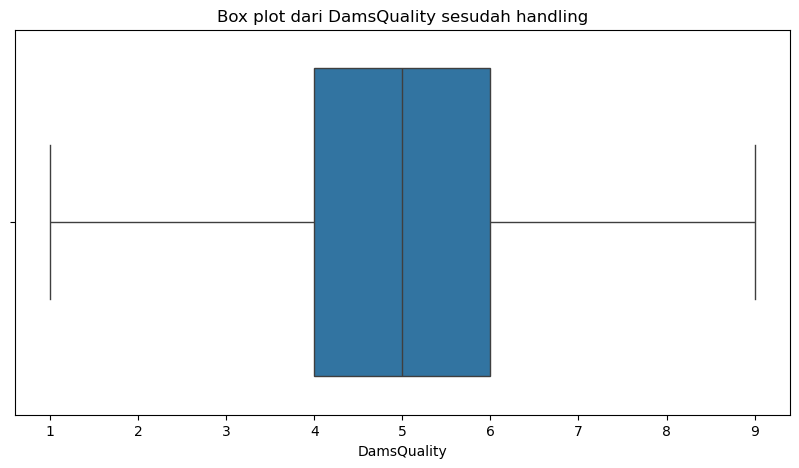

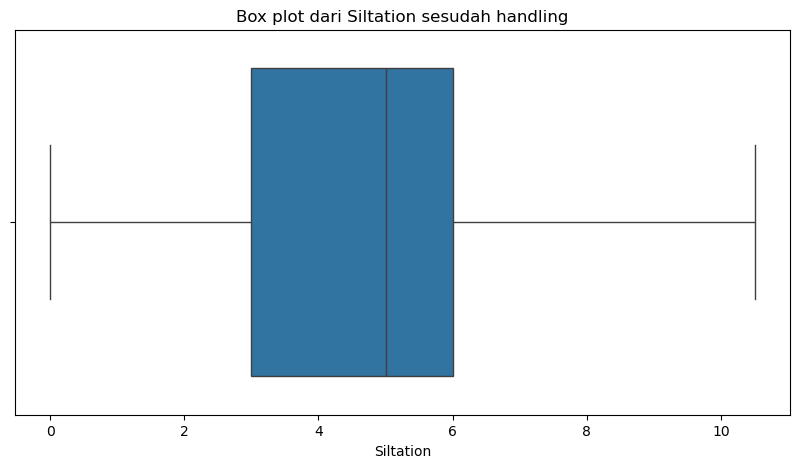

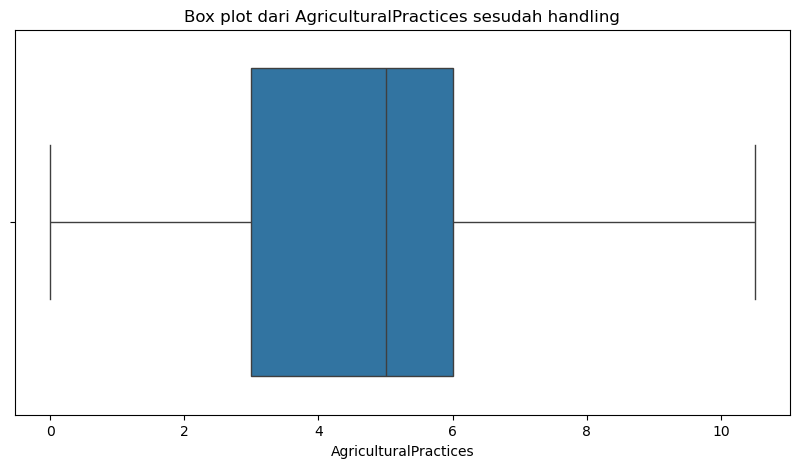

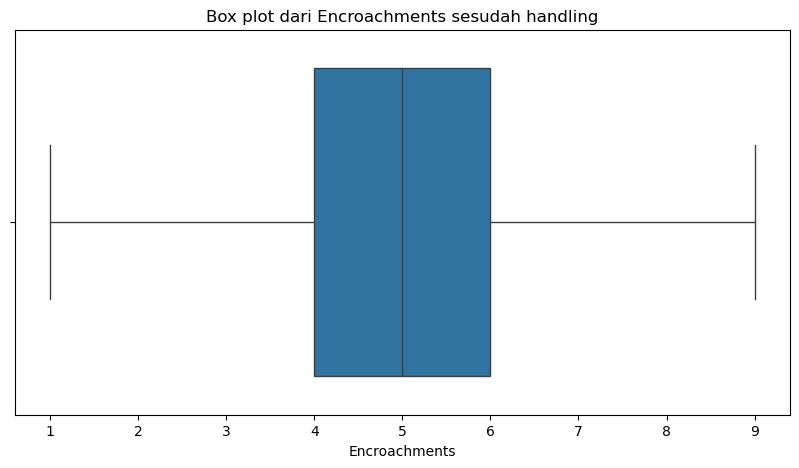

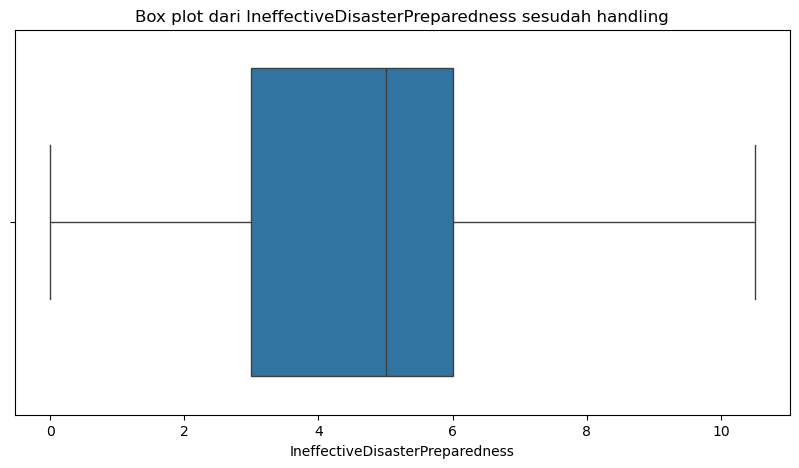

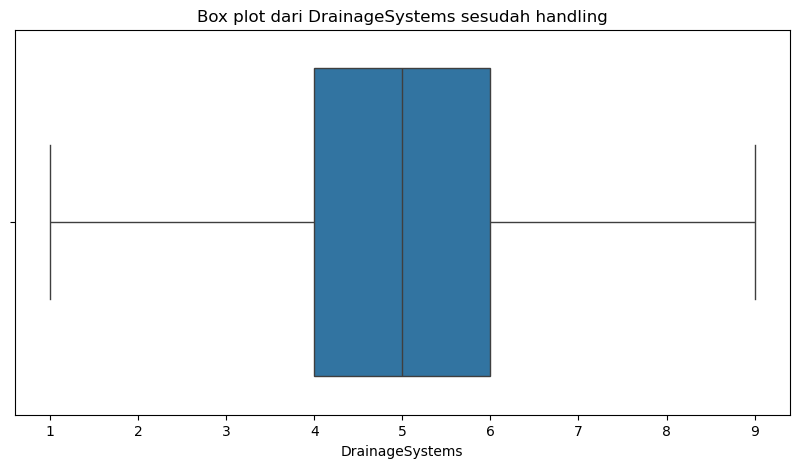

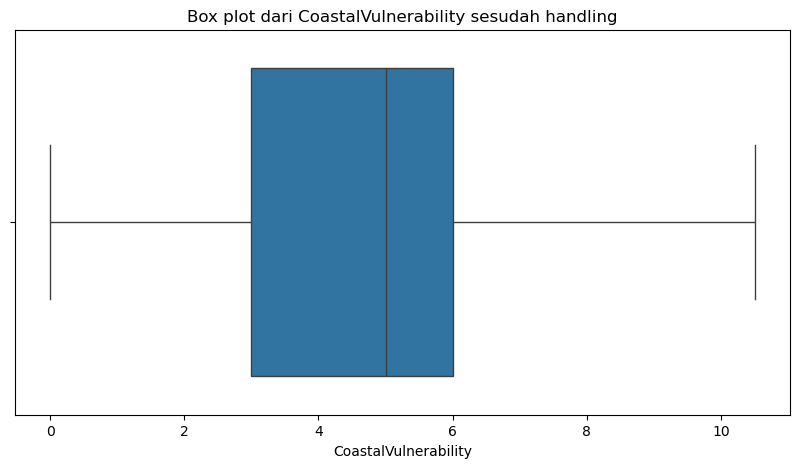

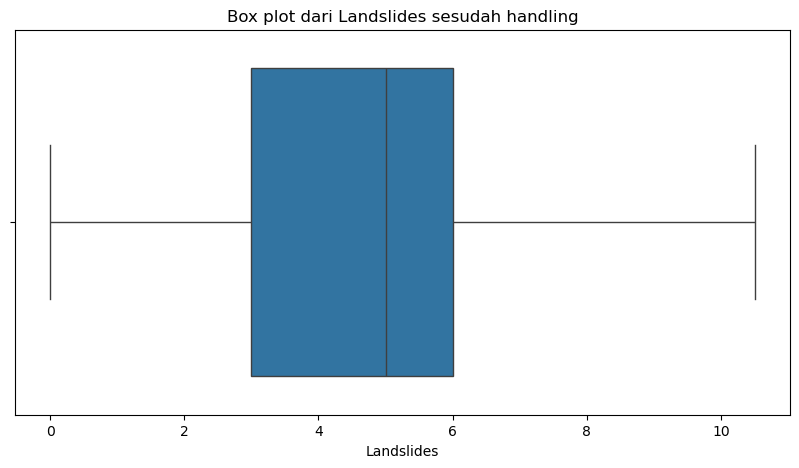

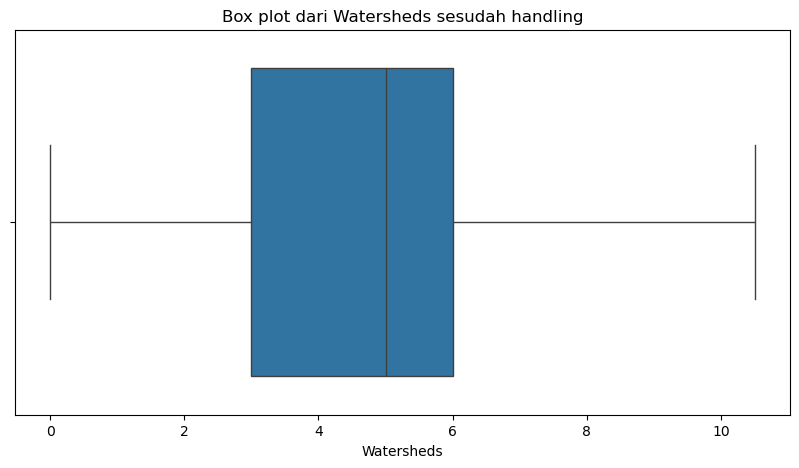

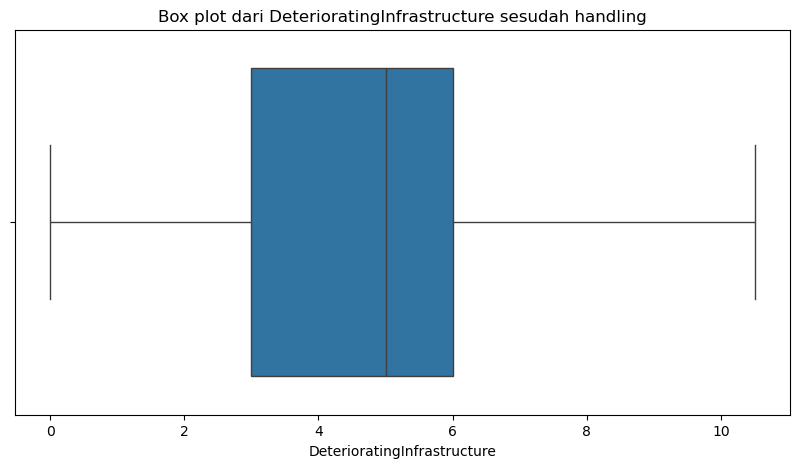

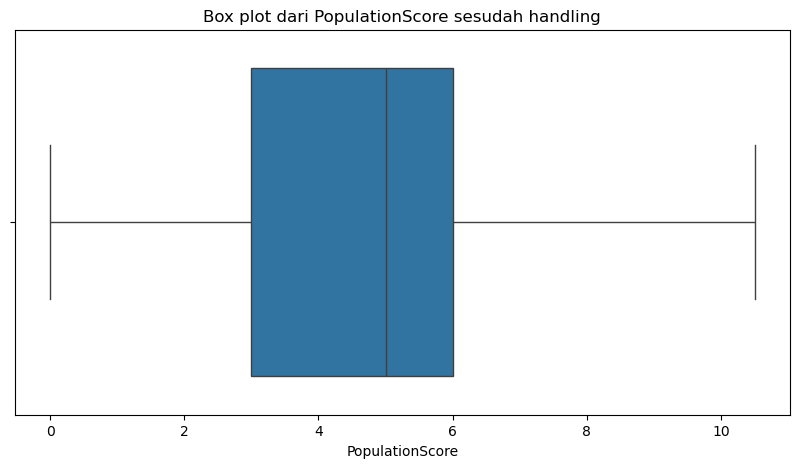

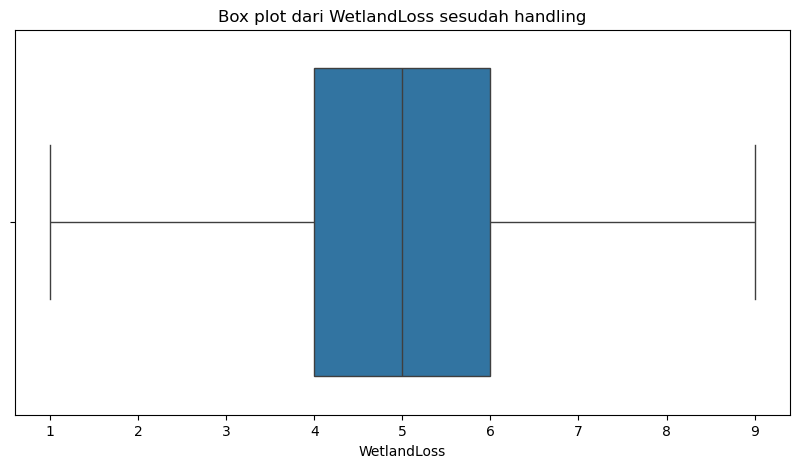

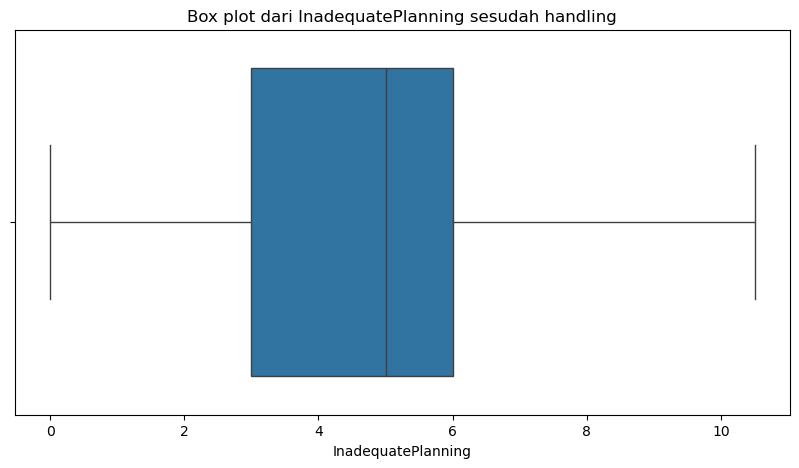

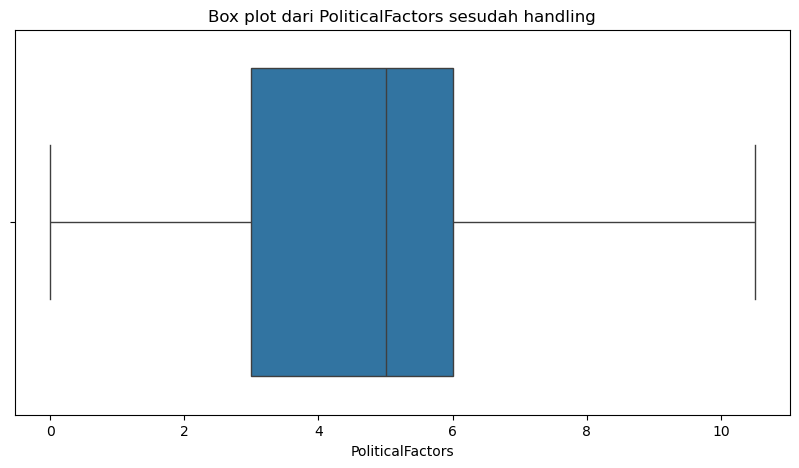

In [14]:
# Boxplot setelah handling outlier

for feature in X_train.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=feature, data=X_train)
    plt.title(f"Box plot dari {feature} sesudah handling")
    plt.show()

Setelah handling menggunakan metode IQR , terlihat visulisasi boxplot sudah bersih dan tidak ada outlier

In [15]:
X_train.dtypes

MonsoonIntensity                   float64
TopographyDrainage                 float64
RiverManagement                    float64
Deforestation                      float64
Urbanization                       float64
ClimateChange                      float64
DamsQuality                        float64
Siltation                          float64
AgriculturalPractices              float64
Encroachments                      float64
IneffectiveDisasterPreparedness    float64
DrainageSystems                    float64
CoastalVulnerability               float64
Landslides                         float64
Watersheds                         float64
DeterioratingInfrastructure        float64
PopulationScore                    float64
WetlandLoss                        float64
InadequatePlanning                 float64
PoliticalFactors                   float64
dtype: object

In [16]:
X_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
12196,3.0,9.0,1.0,4.0,7.0,5.0,1.0,3.0,2.0,5.0,9.0,4.0,1.0,6.0,6.0,6.0,3.0,8.0,5.0,6.0
930548,4.0,8.0,6.0,4.0,3.0,7.0,3.0,6.0,10.0,6.0,4.0,3.0,3.0,3.0,6.0,2.0,8.0,5.0,5.0,4.0
111043,8.0,4.0,9.0,3.0,5.0,4.0,4.0,6.0,6.0,4.0,6.0,7.0,6.0,6.0,5.0,7.0,2.0,3.0,5.0,2.0
1016473,5.0,4.0,6.0,2.0,4.0,10.0,4.0,6.0,6.0,5.0,7.0,5.0,3.0,5.0,5.0,4.0,9.0,3.0,2.0,10.0
693536,4.0,5.0,5.0,4.0,3.0,5.0,6.0,9.0,4.0,5.0,1.0,2.0,2.0,4.0,6.0,3.0,7.0,3.0,7.0,5.0


In [17]:
X_test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
503258,7,5,7,8,3,6,5,4,4,5,5,2,2,5,7,4,5,7,5,4
888180,5,5,8,5,5,5,7,5,3,11,3,5,5,7,4,6,7,4,9,2
1096427,7,3,5,2,4,4,3,7,7,4,6,4,5,5,2,2,10,5,4,3
357587,7,4,2,11,2,6,8,6,9,5,3,7,7,4,1,2,8,2,7,6
239801,4,7,7,10,4,6,7,8,4,1,8,8,6,5,10,5,2,3,3,2


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numerik
scaler = StandardScaler()

# fit dan transform pada data train
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Transform pada data test tanpa fit
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

print("X_train setelah Standardisasi")
print(X_train)
print("\nX_test setelah Standardisasi")
print(X_test)

X_train setelah Standardisasi
         MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
12196           -0.943032            1.976301        -1.987975      -0.466906   
930548          -0.449966            1.492267         0.543193      -0.466906   
111043           1.522300           -0.443871         2.061894      -0.978110   
1016473          0.043101           -0.443871         0.543193      -1.489313   
693536          -0.449966            0.040164         0.036959      -0.466906   
...                   ...                 ...              ...            ...   
836489           1.522300           -0.927905        -1.481742       0.555501   
491263          -0.943032           -0.443871        -0.975508      -0.978110   
470924          -0.943032           -0.927905         1.555660       0.044297   
491755          -1.436099            1.008232         0.543193       0.555501   
128037          -0.449966           -0.443871        -1.481742       0.555501  

## Penjelasan Singkat Standarisasi Data

Standarisasi data adalah proses mengubah skala data numerik sehingga memiliki rata-rata (mean) 0 dan standar deviasi 1. Proses ini juga dikenal sebagai penskalaan Z-score.

**Mengapa Melakukan Standarisasi Data?**

*   **Membandingkan Variabel dengan Skala Berbeda:** Standarisasi memungkinkan kita untuk membandingkan variabel yang diukur dalam skala yang berbeda. Misalnya, membandingkan tinggi badan (dalam cm) dengan berat badan (dalam kg) secara langsung bisa menyesatkan karena skala dan unitnya berbeda. Setelah distandarisasi, keduanya berada pada skala yang sama.
*   **Meningkatkan Kinerja Model:** Beberapa algoritma *machine learning*, seperti *Support Vector Machines (SVM)*, *k-Nearest Neighbors (k-NN)*, dan regresi dengan regularisasi (L1/L2), sangat sensitif terhadap skala fitur. Standarisasi dapat meningkatkan kinerja dan konvergensi algoritma-algoritma ini.
*   **Menghindari Dominasi Fitur dengan Nilai Besar:** Jika satu fitur memiliki nilai yang jauh lebih besar dari fitur lainnya, fitur tersebut dapat mendominasi perhitungan jarak atau metrik lainnya dalam model. Standarisasi mencegah hal ini.

In [19]:
# Mengidentifikasi baris duplikat
duplicates = X_train.duplicated()

print("Baris duplikat : ")
print(X_train[duplicates])

Baris duplikat : 
Empty DataFrame
Columns: [MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors]
Index: []


Hasil dari identifikasi data duplikat bisa dilihat bahwa data ini tidak ada yang duplikat

In [20]:
X_train.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05,8.943650e+05
mean,-1.692849e-16,-9.102993e-17,9.676598e-18,-1.168183e-16,-1.413594e-16,-1.282110e-16,-2.208775e-16,1.556995e-16,5.845682e-17,1.424955e-16,-1.459355e-16,7.614164e-17,-3.892884e-19,1.488631e-16,1.521005e-17,1.525852e-16,1.322071e-16,1.008634e-16,1.113881e-16,-1.622459e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.422232e+00,-2.380008e+00,-1.987975e+00,-2.000517e+00,-2.401141e+00,-2.424313e+00,-1.982251e+00,-2.413578e+00,-2.414564e+00,-1.979473e+00,-2.406949e+00,-1.987351e+00,-2.400056e+00,-2.399108e+00,-2.396388e+00,-2.413326e+00,-2.403406e+00,-1.989998e+00,-2.403874e+00,-2.388818e+00
25%,-9.430321e-01,-9.279052e-01,-4.692744e-01,-4.669064e-01,-9.411035e-01,-9.477070e-01,-4.667580e-01,-9.413944e-01,-9.462737e-01,-4.634902e-01,-9.442886e-01,-4.644035e-01,-9.436601e-01,-9.372206e-01,-9.351645e-01,-9.410315e-01,-9.377726e-01,-4.677708e-01,-9.418374e-01,-9.349172e-01
50%,4.310091e-02,4.016360e-02,3.695922e-02,4.429708e-02,3.225491e-02,3.669701e-02,3.840618e-02,4.006112e-02,3.258663e-02,4.183751e-02,3.081864e-02,4.324551e-02,2.727050e-02,3.737107e-02,3.898436e-02,4.049790e-02,3.931643e-02,3.963835e-02,3.285379e-02,3.434997e-02
75%,5.361674e-01,5.241980e-01,5.431928e-01,5.555006e-01,5.189341e-01,5.288990e-01,5.435704e-01,5.307889e-01,5.220168e-01,5.471652e-01,5.183722e-01,5.508946e-01,5.127358e-01,5.246669e-01,5.260588e-01,5.312626e-01,5.278609e-01,5.470475e-01,5.201994e-01,5.189836e-01
max,2.754967e+00,2.702353e+00,2.061894e+00,2.089111e+00,2.708991e+00,2.743808e+00,2.059063e+00,2.739064e+00,2.724453e+00,2.063148e+00,2.712363e+00,2.073842e+00,2.697330e+00,2.717498e+00,2.717894e+00,2.739704e+00,2.726311e+00,2.069275e+00,2.713255e+00,2.699835e+00


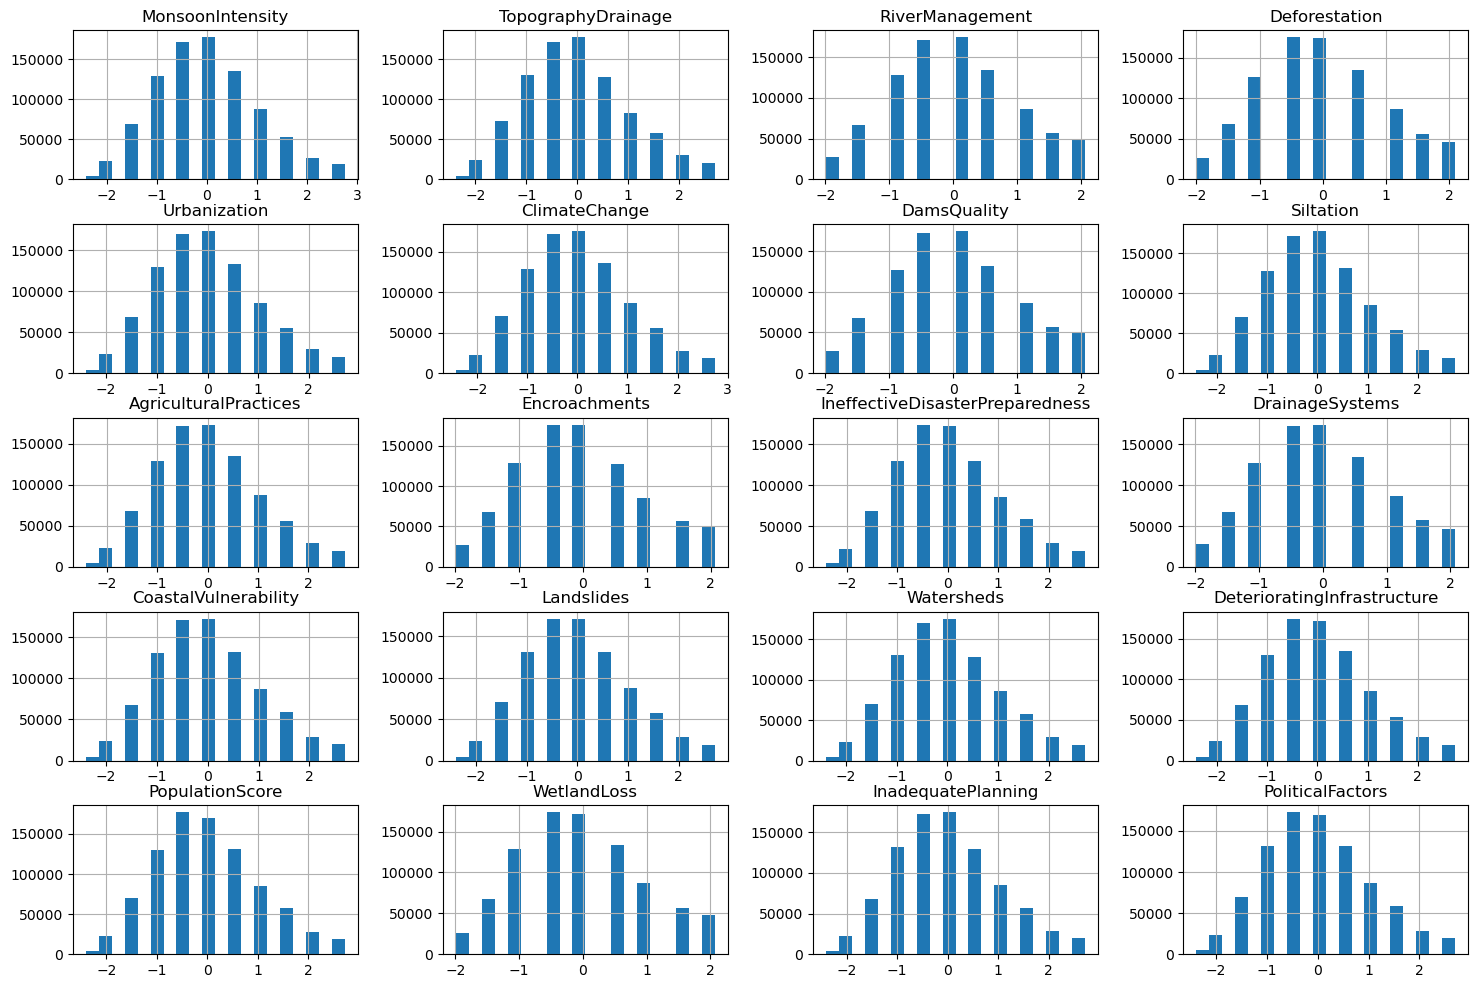

In [21]:
X_train.hist(bins=20, figsize=(18, 12))
plt.tight_layout
plt.show()

## Interpretasi Histogram Data Latih Setelah Standarisasi

Visualisasi histogram menggunakan `X_train.hist(bins=20, figsize=(18, 12))` memberikan gambaran distribusi setiap fitur dalam data latih setelah proses standarisasi. Interpretasi berikut merangkum poin-poin penting yang dapat diamati:

**Prinsip Umum Standarisasi:**

*   **Rata-rata Mendekati Nol:** Setelah standarisasi, nilai rata-rata (mean) setiap fitur idealnya mendekati nol. Hal ini tercermin pada histogram melalui posisi pusat distribusi yang berpusat di sekitar nilai nol pada sumbu horizontal (sumbu-x).
*   **Standar Deviasi Mendekati Satu:** Standar deviasi setiap fitur setelah standarisasi idealnya mendekati satu. Implikasinya, sebaran data terkonsentrasi dalam rentang -3 hingga +3 pada sumbu-x. Sebagian besar observasi akan berada dalam rentang ini, mencerminkan karakteristik distribusi normal standar.
*   **Invarian Bentuk Distribusi:** Standarisasi merupakan transformasi linear yang *tidak mengubah bentuk distribusi* data. Artinya, jika sebelum standarisasi data menunjukkan kemiringan (skewness) atau karakteristik non-normal lainnya, karakteristik tersebut akan tetap ada setelah standarisasi. Standarisasi hanya mengubah skala data, bukan bentuk distribusinya.

**Interpretasi Berdasarkan Histogram :**

*   **Distribusi Simetris/Mendekati Normal:** Sebagian besar histogram yang ditampilkan mengindikasikan distribusi yang relatif simetris di sekitar nol. Meskipun tidak semua histogram membentuk kurva lonceng Gaussian ideal (distribusi normal), pola ini menunjukkan bahwa data tersebar cukup merata di kedua sisi nilai rata-rata. Beberapa fitur mungkin menunjukkan sedikit kemiringan, namun secara umum, distribusi setelah standarisasi cukup baik.
*   **Rentang Data yang Teramati:** Sebagian besar data terdistribusi dalam rentang -2 hingga +2 atau -3 hingga +3 pada sumbu-x. Hal ini konsisten dengan ekspektasi setelah standarisasi, di mana mayoritas data terletak dalam beberapa standar deviasi dari nilai rata-rata.
*   **Perbandingan dengan Distribusi Sebelum Standarisasi:** Perbandingan dengan histogram sebelum standarisasi sangat informatif. Perbedaan utama terletak pada skala sumbu-x. Sebelum standarisasi, setiap fitur mungkin memiliki skala yang berbeda, bergantung pada satuan dan rentang nilai aslinya. Setelah standarisasi, semua fitur berada pada skala yang sama, memfasilitasi perbandingan distribusi antar fitur.

**Contoh Interpretasi Spesifik:**

*   Histogram dengan puncak yang tinggi di sekitar nol dan ekor yang tipis di kedua sisi mengindikasikan bahwa sebagian besar data terkonsentrasi di sekitar nilai rata-rata.
*   Histogram dengan ekor yang lebih panjang di sisi kanan (nilai positif) menunjukkan kemiringan positif (positive skewness). Sebaliknya, ekor yang lebih panjang di sisi kiri menunjukkan kemiringan negatif (negative skewness).

**Signifikansi Visualisasi Ini:**

*   **Verifikasi Keberhasilan Standarisasi:** Histogram ini memvalidasi keberhasilan proses standarisasi. Kita dapat mengamati bahwa rata-rata setiap fitur mendekati nol dan sebaran datanya sesuai dengan standar deviasi yang mendekati satu.
*   **Pemahaman Distribusi Pasca Transformasi:** Meskipun standarisasi tidak mengubah bentuk distribusi, visualisasi tetap penting untuk mengidentifikasi potensi anomali atau masalah lain yang mungkin timbul setelah transformasi.
*   **Informasi untuk Pemodelan:** Bentuk distribusi data dapat memengaruhi pemilihan model *machine learning* yang sesuai. Beberapa model, misalnya, memberikan kinerja yang lebih baik dengan data yang terdistribusi normal.

**Kesimpulan:**

Visualisasi histogram menunjukkan bahwa data latih telah berhasil distandarisasi. Rata-rata setiap fitur mendekati nol, dan mayoritas data berada dalam rentang beberapa standar deviasi dari rata-rata. Bentuk distribusi umumnya simetris atau mendekati normal. Informasi ini krusial untuk memastikan data telah diproses dengan tepat sebelum digunakan untuk melatih model *machine learning*.

# Modelling

In [22]:
# import library
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error


In [23]:
# membuat function melatih model dan evaluasi model
def evaluate_regression_mode(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return{"Model": model.__class__.__name__, "R-squared": r2, "MAPE": mape, "MAE": mae, "RMSE": rmse}

# Dictionary model
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=1),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=1)
}

model_result = []
for model_name, model in models.items():
    results = evaluate_regression_mode(model, X_train, X_test, y_train, y_test)
    model_result.append(results)

results_df = pd.DataFrame(model_result)
results_df

,Model,R-squared,MAPE,MAE,RMSE
0,LinearRegression,0.844302,0.032555,0.016089,0.020180
1,KNeighborsRegressor,0.672911,0.047682,0.023651,0.029249
2,DecisionTreeRegressor,0.056330,0.079284,0.039498,0.049680
3,SVR,0.649926,0.050661,0.024917,0.030259
4,GradientBoostingRegressor,0.614187,0.052840,0.026130,0.031766


## Evaluasi Model Regresi untuk Prediksi Banjir

Tabel berikut menyajikan hasil evaluasi beberapa model regresi yang digunakan untuk memprediksi probabilitas banjir. Metrik evaluasi yang digunakan meliputi R-squared, MAPE (Mean Absolute Percentage Error), MAE (Mean Absolute Error), dan RMSE (Root Mean Squared Error).

| No. | Model                       | R-squared | MAPE      | MAE       | RMSE      |
| --- | -------------------------- | --------- | --------- | --------- | --------- |
| 0   | LinearRegression            | 0.844302  | 0.032555  | 0.016089  | 0.020180  |
| 1   | KNeighborsRegressor         | 0.672911  | 0.047682  | 0.023651  | 0.029249  |
| 2   | DecisionTreeRegressor       | 0.056330  | 0.079284  | 0.039498  | 0.049680  |
| 3   | SVR                         | 0.649926  | 0.050661  | 0.024917  | 0.030259  |
| 4   | GradientBoostingRegressor   | 0.614187  | 0.052840  | 0.026130  | 0.031766  |

**Interpretasi Metrik Evaluasi:**

*   **R-squared (Koefisien Determinasi):** Mengukur seberapa baik model menjelaskan varians dalam variabel target. Nilai berkisar antara 0 dan 1. Nilai yang lebih tinggi menunjukkan *goodness of fit* yang lebih baik.
*   **MAPE (Mean Absolute Percentage Error):** Mengukur rata-rata persentase kesalahan absolut prediksi. Nilai yang lebih rendah menunjukkan kinerja yang lebih baik. MAPE sulit diinterpretasi jika nilai target mendekati nol.
*   **MAE (Mean Absolute Error):** Mengukur rata-rata kesalahan absolut prediksi dalam unit yang sama dengan variabel target. Nilai yang lebih rendah menunjukkan kinerja yang lebih baik.
*   **RMSE (Root Mean Squared Error):** Mengukur akar kuadrat dari rata-rata kesalahan kuadrat prediksi. Lebih sensitif terhadap *outlier* dibandingkan MAE. Nilai yang lebih rendah menunjukkan kinerja yang lebih baik.

**Analisis Kinerja Model:**

Berdasarkan tabel di atas, dapat ditarik beberapa kesimpulan:

*   **LinearRegression Unggul:** Model *LinearRegression* menunjukkan kinerja terbaik di antara model-model yang dievaluasi, dengan R-squared tertinggi (0.844302) dan nilai MAPE, MAE, dan RMSE terendah. Ini mengindikasikan bahwa model regresi linear cukup baik dalam memprediksi probabilitas banjir pada dataset ini.
*   **Kinerja Model Lainnya:** Model *KNeighborsRegressor* dan *SVR* menunjukkan kinerja yang moderat, dengan R-squared di sekitar 0.6-0.7. Nilai MAPE, MAE, dan RMSE mereka juga lebih tinggi dibandingkan dengan *LinearRegression*.
*   **DecisionTreeRegressor Kinerja Buruk:** Model *DecisionTreeRegressor* menunjukkan kinerja yang sangat buruk, dengan R-squared yang sangat rendah (0.056330) dan nilai MAPE, MAE, dan RMSE yang tinggi. Ini mengindikasikan bahwa model *DecisionTreeRegressor* mungkin *overfitting* pada data latih atau tidak cocok untuk dataset ini.
*   **GradientBoostingRegressor:** Model ini menunjukkan kinerja yang lebih rendah dibandingkan *LinearRegression*, dengan nilai R-squared yang lebih rendah dan nilai error yang lebih tinggi.

**Kesimpulan:**

Dari evaluasi ini, *LinearRegression* tampaknya menjadi model yang paling sesuai untuk memprediksi probabilitas banjir pada dataset ini, berdasarkan metrik evaluasi yang digunakan. Model *DecisionTreeRegressor* menunjukkan kinerja yang sangat buruk dan perlu dipertimbangkan kembali atau di-tuning lebih lanjut. Model *KNeighborsRegressor*, *SVR*, dan *GradientBoostingRegressor* menunjukkan kinerja yang moderat, tetapi masih kalah dibandingkan dengan *LinearRegression*.

In [24]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Melakukan 5-fold cross-validation pada setiap model dan menampilkan hasilnya
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Akurasi {model_name} dengan 5-fold cross validation: {scores.mean():.2f} dengan standar deviasi {scores.std():.2f}")

Akurasi Linear Regression dengan 5-fold cross validation: 0.84 dengan standar deviasi 0.00
Akurasi K-Neighbors Regressor dengan 5-fold cross validation: 0.66 dengan standar deviasi 0.00
Akurasi Decision Tree Regressor dengan 5-fold cross validation: 0.04 dengan standar deviasi 0.00
Akurasi Support Vector Regressor dengan 5-fold cross validation: 0.67 dengan standar deviasi 0.02
Akurasi Gradient Boosting Regressor dengan 5-fold cross validation: 0.61 dengan standar deviasi 0.00


## Hasil Validasi Silang 5-Fold dan Interpretasi Model Regresi

Berikut adalah hasil validasi silang 5-fold untuk beberapa model regresi, beserta interpretasi dan rekomendasi:

**Tabel Hasil Validasi Silang:**

| Model                       | Akurasi Rata-rata | Standar Deviasi |
|---------------------------|-------------------|-------------------|
| Linear Regression           | 0.84              | 0.00              |
| K-Neighbors Regressor        | 0.66              | 0.00              |
| Decision Tree Regressor      | 0.04              | 0.00              |
| Support Vector Regressor (SVR)| 0.67              | 0.02              |
| Gradient Boosting Regressor  | 0.61              | 0.00              |

**Interpretasi Hasil:**

*   **Linear Regression:** Menunjukkan kinerja terbaik dengan akurasi rata-rata 0.84 dan standar deviasi 0.00. Ini mengindikasikan model yang stabil dan generalisasinya baik.
*   **K-Neighbors Regressor:** Kinerja moderat dengan akurasi 0.66 dan standar deviasi 0.00. Konsisten, tetapi kurang optimal dibandingkan Linear Regression.
*   **Decision Tree Regressor:** Kinerja sangat buruk (0.04) dengan standar deviasi 0.00. Kemungkinan mengalami *underfitting* dan tidak cocok untuk data.
*   **Support Vector Regressor (SVR):** Kinerja sedikit lebih baik dari K-Neighbors Regressor (0.67) dengan standar deviasi 0.02, menunjukkan sedikit variasi antar fold.
*   **Gradient Boosting Regressor:** Kinerja moderat (0.61) dengan standar deviasi 0.00, konsisten tetapi di bawah Linear Regression.

**Interpretasi Standar Deviasi:**

Standar deviasi yang rendah (mendekati 0) menunjukkan konsistensi kinerja model di setiap fold. Standar deviasi yang lebih tinggi (seperti pada SVR) menandakan variasi kinerja yang lebih besar antar fold, tetapi dalam kasus ini masih dapat diterima.

**Perbandingan dengan Evaluasi Sebelumnya:**

Hasil validasi silang ini konsisten dengan evaluasi sebelumnya menggunakan metrik R-squared, MAPE, MAE, dan RMSE.

**Penutup dan Rekomendasi:**

Berdasarkan evaluasi ini, **Linear Regression** adalah model yang paling direkomendasikan.

Poin-poin penting:

*   **Decision Tree Regressor:** Perlu investigasi lebih lanjut karena kinerjanya sangat buruk. Pertimbangkan model yang lebih kompleks atau *feature engineering*.
*   **Model Lainnya:** *Hyperparameter tuning* dapat dicoba untuk meningkatkan kinerja, tetapi Linear Regression sudah memberikan hasil yang baik.
*   **Pertimbangan Tambahan:** Performa model bergantung pada kualitas data. *Retraining* dan evaluasi ulang diperlukan jika ada data baru. Pertimbangkan juga konteks aplikasi dan persyaratan spesifik.

Dengan analisis ini, Anda dapat memilih dan mengimplementasikan model prediksi yang paling tepat. Linear Regression saat ini merupakan pilihan terbaik.